In [ ]:
%pip install gym
%pip install tensorflow-macos
%pip install tensorflow-metal


In [ ]:
%pip install Cmake
%pip install atari-py
%pip install matplotlib

In [ ]:
!git clone https://github.com/wau/keras-rl2.git
% keras-rl2/setup.py install

import rl

In [ ]:
%pip install keras-rl2


In [1]:
import numpy as np
import gym
import tensorflow as tf
import matplotlib.pyplot as plt


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go awa

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, Dense
from keras.optimizers import Adam

In [3]:
from collections import deque, Counter
import random
from datetime import datetime

In [4]:
from ale_py import ALEInterface
ale = ALEInterface()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ale_py/gym/environment.py:11: DeprecationWarning: Importing atari-py roms won't be supported in future releases of ale-py.
  import ale_py.roms as roms
A.L.E: Arcade Learning Environment (version +a54a328)
[Powered by Stella]


In [ ]:
%pip install autorom

In [5]:
from ale_py.roms import SpaceInvaders
ale.loadROM(SpaceInvaders)

Game console created:
  ROM file:  /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ale_py/roms/space_invaders.bin
  Cart Name: Space Invaders (1978) (Atari) [!]
  Cart MD5:  72ffbef6504b75e69ee1045af9075f66
  Display Format:  AUTO-DETECT ==> NTSC
  ROM Size:        4096
  Bankswitch Type: AUTO-DETECT ==> 4K

Running ROM file...
Random seed is 1671160244


In [ ]:
%pip install gym==0.25.2

In [ ]:
%pip install autorom[accept-rom-license]
%pip install 'stable-baselines[mpi]'


In [6]:
from ale_py.roms import MsPacman
ale.loadROM(MsPacman)

Game console created:
  ROM file:  /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ale_py/roms/ms_pacman.bin
  Cart Name: Ms. Pac-Man (1982) (Atari)
  Cart MD5:  87e79cd41ce136fd4f72cc6e2c161bee
  Display Format:  AUTO-DETECT ==> NTSC
  ROM Size:        8192
  Bankswitch Type: AUTO-DETECT ==> F8

Running ROM file...
Random seed is 1671160248


18
['NOOP', 'FIRE', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT', 'UPFIRE', 'RIGHTFIRE', 'LEFTFIRE', 'DOWNFIRE', 'UPRIGHTFIRE', 'UPLEFTFIRE', 'DOWNRIGHTFIRE', 'DOWNLEFTFIRE']


A.L.E: Arcade Learning Environment (version +a54a328)
[Powered by Stella]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/utils/seeding.py:159: DeprecationWarning: WARN: Function `hash_seed(seed, max_bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/utils/seeding.py:203: DeprecationWarning: WARN: Function `_bigint_from_bytes(bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/wrappers/step_api_compatibility.py:

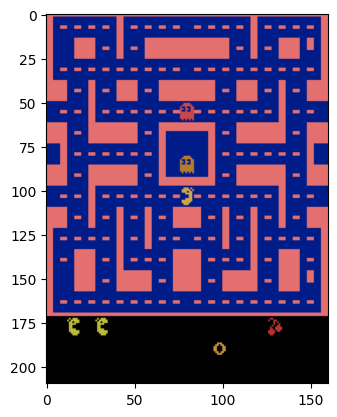

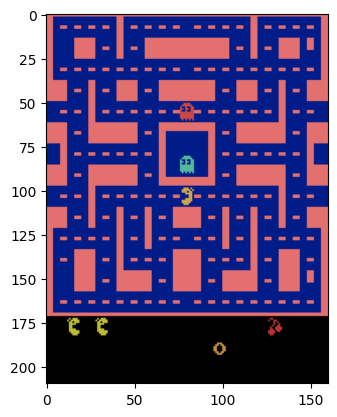

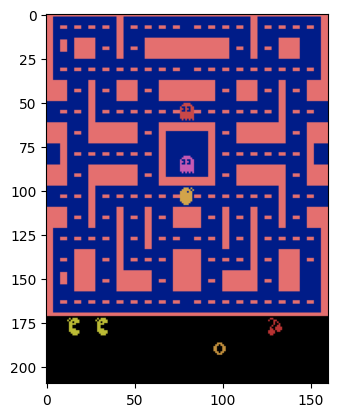

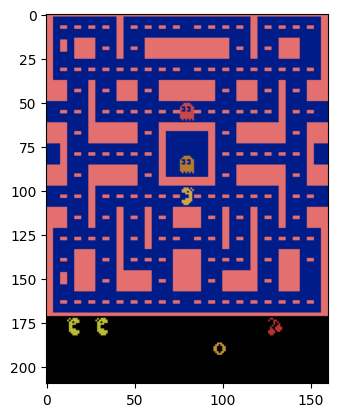

In [7]:
env = gym.make("ALE/MsPacman-v5")
n_outputs = env.action_space.n
print(n_outputs)
print(env.env.get_action_meanings())

observation = env.reset()

for i in range(25):
  
  if i > 20:
    plt.imshow(observation)
    plt.show()

  observation, _, _, _ = env.step(1)

In [8]:
episodes = 5
for episode in range (1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        env.render(mode='rgb_array')
        action = random.choice([0,1,2,3,4,5])
        n_state, reward, done, info = env.step(action=action)
        score+=reward
    
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:280: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(


Episode:1 Score:340.0
Episode:2 Score:390.0
Episode:3 Score:290.0
Episode:4 Score:170.0
Episode:5 Score:290.0


In [ ]:
# import rl 

# from rl.agents import DQNAgent
# from rl.memory import SequentialMemory
# from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

# from stable_baselines.common.atari_wrappers import make_atari, wrap_deepmind

In [9]:
# %pip install opencv-python

from collections import deque

import numpy as np
import gym
from gym import spaces
import cv2  # pytype:disable=import-error
cv2.ocl.setUseOpenCL(False)


class NoopResetEnv(gym.Wrapper):
    def __init__(self, env, noop_max=30):
        """
        Sample initial states by taking random number of no-ops on reset.
        No-op is assumed to be action 0.
        :param env: (Gym Environment) the environment to wrap
        :param noop_max: (int) the maximum value of no-ops to run
        """
        gym.Wrapper.__init__(self, env)
        self.noop_max = noop_max
        self.override_num_noops = None
        self.noop_action = 0
        assert env.unwrapped.get_action_meanings()[0] == 'NOOP'

    def reset(self, **kwargs):
        self.env.reset(**kwargs)
        if self.override_num_noops is not None:
            noops = self.override_num_noops
        else:
            noops = self.unwrapped.np_random.randint(1, self.noop_max + 1)
        assert noops > 0
        obs = None
        for _ in range(noops):
            obs, _, done, _ = self.env.step(self.noop_action)
            if done:
                obs = self.env.reset(**kwargs)
        return obs

    def step(self, action):
        return self.env.step(action)


class FireResetEnv(gym.Wrapper):
    def __init__(self, env):
        """
        Take action on reset for environments that are fixed until firing.
        :param env: (Gym Environment) the environment to wrap
        """
        gym.Wrapper.__init__(self, env)
        assert env.unwrapped.get_action_meanings()[1] == 'FIRE'
        assert len(env.unwrapped.get_action_meanings()) >= 3

    def reset(self, **kwargs):
        self.env.reset(**kwargs)
        obs, _, done, _ = self.env.step(1)
        if done:
            self.env.reset(**kwargs)
        obs, _, done, _ = self.env.step(2)
        if done:
            self.env.reset(**kwargs)
        return obs

    def step(self, action):
        return self.env.step(action)


class EpisodicLifeEnv(gym.Wrapper):
    def __init__(self, env):
        """
        Make end-of-life == end-of-episode, but only reset on true game over.
        Done by DeepMind for the DQN and co. since it helps value estimation.
        :param env: (Gym Environment) the environment to wrap
        """
        gym.Wrapper.__init__(self, env)
        self.lives = 0
        self.was_real_done = True

    def step(self, action):
        obs, reward, done, info = self.env.step(action)
        self.was_real_done = done
        # check current lives, make loss of life terminal,
        # then update lives to handle bonus lives
        lives = self.env.unwrapped.ale.lives()
        if 0 < lives < self.lives:
            # for Qbert sometimes we stay in lives == 0 condtion for a few frames
            # so its important to keep lives > 0, so that we only reset once
            # the environment advertises done.
            done = True
        self.lives = lives
        return obs, reward, done, info

    def reset(self, **kwargs):
        """
        Calls the Gym environment reset, only when lives are exhausted.
        This way all states are still reachable even though lives are episodic,
        and the learner need not know about any of this behind-the-scenes.
        :param kwargs: Extra keywords passed to env.reset() call
        :return: ([int] or [float]) the first observation of the environment
        """
        if self.was_real_done:
            obs = self.env.reset(**kwargs)
        else:
            # no-op step to advance from terminal/lost life state
            obs, _, _, _ = self.env.step(0)
        self.lives = self.env.unwrapped.ale.lives()
        return obs


class MaxAndSkipEnv(gym.Wrapper):
    def __init__(self, env, skip=4):
        """
        Return only every `skip`-th frame (frameskipping)
        :param env: (Gym Environment) the environment
        :param skip: (int) number of `skip`-th frame
        """
        gym.Wrapper.__init__(self, env)
        # most recent raw observations (for max pooling across time steps)
        self._obs_buffer = np.zeros(
            (2,) + env.observation_space.shape, dtype=env.observation_space.dtype)
        self._skip = skip

    def step(self, action):
        """
        Step the environment with the given action
        Repeat action, sum reward, and max over last observations.
        :param action: ([int] or [float]) the action
        :return: ([int] or [float], [float], [bool], dict) observation, reward, done, information
        """
        total_reward = 0.0
        done = None
        for i in range(self._skip):
            obs, reward, done, info = self.env.step(action)
            if i == self._skip - 2:
                self._obs_buffer[0] = obs
            if i == self._skip - 1:
                self._obs_buffer[1] = obs
            total_reward += reward
            if done:
                break
        # Note that the observation on the done=True frame
        # doesn't matter
        max_frame = self._obs_buffer.max(axis=0)

        return max_frame, total_reward, done, info

    def reset(self, **kwargs):
        return self.env.reset(**kwargs)


class ClipRewardEnv(gym.RewardWrapper):
    def __init__(self, env):
        """
        clips the reward to {+1, 0, -1} by its sign.
        :param env: (Gym Environment) the environment
        """
        gym.RewardWrapper.__init__(self, env)

    def reward(self, reward):
        """
        Bin reward to {+1, 0, -1} by its sign.
        :param reward: (float)
        """
        return np.sign(reward)


class WarpFrame(gym.ObservationWrapper):
    def __init__(self, env):
        """
        Warp frames to 84x84 as done in the Nature paper and later work.
        :param env: (Gym Environment) the environment
        """
        gym.ObservationWrapper.__init__(self, env)
        self.width = 84
        self.height = 84
        self.observation_space = spaces.Box(low=0, high=255, shape=(self.height, self.width, 1),
                                            dtype=env.observation_space.dtype)

    def observation(self, frame):
        """
        returns the current observation from a frame
        :param frame: ([int] or [float]) environment frame
        :return: ([int] or [float]) the observation
        """
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame = cv2.resize(frame, (self.width, self.height),
                           interpolation=cv2.INTER_AREA)
        return frame[:, :, None]


class FrameStack(gym.Wrapper):
    def __init__(self, env, n_frames):
        """Stack n_frames last frames.
        Returns lazy array, which is much more memory efficient.
        See Also
        --------
        stable_baselines.common.atari_wrappers.LazyFrames
        :param env: (Gym Environment) the environment
        :param n_frames: (int) the number of frames to stack
        """
        gym.Wrapper.__init__(self, env)
        self.n_frames = n_frames
        self.frames = deque([], maxlen=n_frames)
        shp = env.observation_space.shape
        self.observation_space = spaces.Box(low=0, high=255, shape=(shp[0], shp[1], shp[2] * n_frames),
                                            dtype=env.observation_space.dtype)

    def reset(self, **kwargs):
        obs = self.env.reset(**kwargs)
        for _ in range(self.n_frames):
            self.frames.append(obs)
        return self._get_ob()

    def step(self, action):
        obs, reward, done, info = self.env.step(action)
        self.frames.append(obs)
        return self._get_ob(), reward, done, info

    def _get_ob(self):
        assert len(self.frames) == self.n_frames
        return LazyFrames(list(self.frames))


class ScaledFloatFrame(gym.ObservationWrapper):
    def __init__(self, env):
        gym.ObservationWrapper.__init__(self, env)
        self.observation_space = spaces.Box(
            low=0, high=1.0, shape=env.observation_space.shape, dtype=np.float32)

    def observation(self, observation):
        # careful! This undoes the memory optimization, use
        # with smaller replay buffers only.
        return np.array(observation).astype(np.float32) / 255.0


class LazyFrames(object):
    def __init__(self, frames):
        """
        This object ensures that common frames between the observations are only stored once.
        It exists purely to optimize memory usage which can be huge for DQN's 1M frames replay
        buffers.
        This object should only be converted to np.ndarray before being passed to the model.
        :param frames: ([int] or [float]) environment frames
        """
        self._frames = frames
        self._out = None

    def _force(self):
        if self._out is None:
            self._out = np.concatenate(self._frames, axis=2)
            self._frames = None
        return self._out

    def __array__(self, dtype=None):
        out = self._force()
        if dtype is not None:
            out = out.astype(dtype)
        return out

    def __len__(self):
        return len(self._force())

    def __getitem__(self, i):
        return self._force()[i]


def make_atari(env_id):
    """
    Create a wrapped atari Environment
    :param env_id: (str) the environment ID
    :return: (Gym Environment) the wrapped atari environment
    """
    env = gym.make(env_id)
    # assert 'NoFrameskip' in env.spec.id
    env = NoopResetEnv(env, noop_max=30)
    env = MaxAndSkipEnv(env, skip=4)
    return env


def wrap_deepmind(env, episode_life=True, clip_rewards=True, frame_stack=False, scale=False):
    """
    Configure environment for DeepMind-style Atari.
    :param env: (Gym Environment) the atari environment
    :param episode_life: (bool) wrap the episode life wrapper
    :param clip_rewards: (bool) wrap the reward clipping wrapper
    :param frame_stack: (bool) wrap the frame stacking wrapper
    :param scale: (bool) wrap the scaling observation wrapper
    :return: (Gym Environment) the wrapped atari environment
    """
    if episode_life:
        env = EpisodicLifeEnv(env)
    if 'FIRE' in env.unwrapped.get_action_meanings():
        env = FireResetEnv(env)
    env = WarpFrame(env)
    if scale:
        env = ScaledFloatFrame(env)
    if clip_rewards:
        env = ClipRewardEnv(env)
    if frame_stack:
        env = FrameStack(env, 4)
    return env

In [10]:
# env = make_atari("ALE/SpaceInvaders-v5")
env = make_atari("ALE/MsPacman-v5")
env = wrap_deepmind(env, frame_stack=True, scale=True)

(84, 84, 4)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/utils/seeding.py:63: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  deprecation(


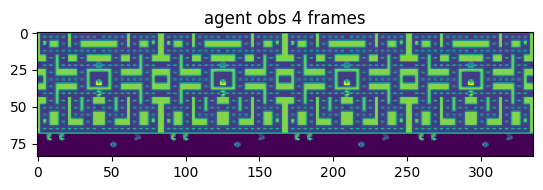

In [11]:
obs = np.array(env.reset())
print(obs.shape)
plt.title("agent obs 4 frames")
plt.imshow(obs.transpose([0, 2, 1]).reshape([env.observation_space.shape[0], -1]))

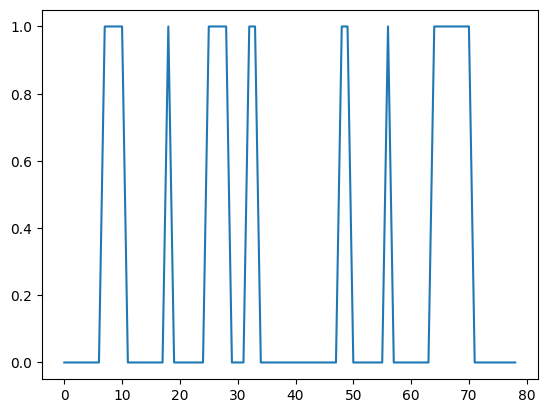

In [12]:
# REWARDS

env.reset()
rewards = []
done = False
while not done: 
    env.render(mode='whatever')
    action = random.choice([0,1,2,3,4,5])
    n_state, reward, done, info = env.step(action=action)
    rewards.append(reward)

plt.plot(rewards)
env.close()

In [13]:
height, width, channels = env.observation_space.shape
actions = env.action_space.n

env.unwrapped.get_action_meanings()

['NOOP',
 'FIRE',
 'UP',
 'RIGHT',
 'LEFT',
 'DOWN',
 'UPRIGHT',
 'UPLEFT',
 'DOWNRIGHT',
 'DOWNLEFT',
 'UPFIRE',
 'RIGHTFIRE',
 'LEFTFIRE',
 'DOWNFIRE',
 'UPRIGHTFIRE',
 'UPLEFTFIRE',
 'DOWNRIGHTFIRE',
 'DOWNLEFTFIRE']

In [14]:
def build_model(): # The network as defined by the DeepMind paper
    inputs = keras.layers.Input(shape=(84, 84, 4,))
    layer1 = Conv2D(32, (8,8), strides=(4,4), activation='relu')(inputs)
    layer2 = Conv2D(64, (4,4), strides=(2,2), activation='relu')(layer1)
    layer3 = Conv2D(64, (3,3), strides=(1,1), activation='relu')(layer2)
    layer4 = Flatten()(layer3)
    layer5 = Dense(512, activation='relu')(layer4)
    action = Dense(actions, activation='linear')(layer5)

    return keras.Model(inputs=inputs, outputs=action)

model = build_model()
model_target = build_model()

model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 84, 84, 4)]       0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1606144   
                                                   

2022-12-15 19:11:43.720857: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-15 19:11:43.721378: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
max_memory_length = 190000
batch_size = 32  
max_steps_per_episode = 10000
update_after_actions = 20
update_target_network = 10000
optimizer = keras.optimizers.Adam(learning_rate=0.00025, clipnorm=1.0)
loss_function = keras.losses.Huber()

In [21]:
# Implement replay algorithm as defined by https://keras.io/examples/rl/deep_q_network_breakout/ 
# and transfer functionality to match this notebook's attempt to play PacMan

gamma = 0.99  # discount factor

explore_prob = 1.0  
explore_prob_max_1 = 1.0 
explore_prob_min_1 = 0.2  
explore_prob_max_2 = explore_prob_min_1  
explore_prob_min_2 = 0.1
explore_prob_max_3 = explore_prob_min_2  
explore_prob_min_3 = 0.02

explore_prob_interval_1 = (explore_prob_max_1 - explore_prob_min_1)  
explore_prob_interval_2 = (explore_prob_max_2 - explore_prob_min_2)  
explore_prob_interval_3 = (explore_prob_max_3 - explore_prob_min_3)  

explore_prob_greedy_frames = 1000000.0

explore_prob_random_frames = 50000

In [24]:
action_history = []
state_history = []
state_next_history = []
rewards_history = []
done_history = []

training_episodes = 5

episode_reward_history = []
episode_count = 0
frame_count = 0

reduced_actions = [0, 2, 3, 4, 5]

while True:  
    state = np.array(env.reset())
    episode_reward = 0

    for timestep in range(1, max_steps_per_episode):
        
        frame_count += 1

        if frame_count < explore_prob_random_frames or epsilon > np.random.rand(1)[0]:
            action = np.random.choice(reduced_actions)
        else:
            state_tensor = tf.convert_to_tensor(state)
            state_tensor = tf.expand_dims(state_tensor, 0)
            action_probs = model(state_tensor, training=False)
            action = tf.argmax(action_probs[0]).numpy()

        if frame_count < explore_prob_greedy_frames:
          epsilon -= explore_prob_interval_1 / explore_prob_greedy_frames
          epsilon = max(epsilon, explore_prob_min_1)
        
        if frame_count > explore_prob_greedy_frames and frame_count < 2 * explore_prob_greedy_frames:
          epsilon -= explore_prob_interval_2 / explore_prob_greedy_frames
          epsilon = max(epsilon, explore_prob_min_2)
        
        if frame_count > 2 * explore_prob_greedy_frames:
          epsilon -= explore_prob_interval_3 / explore_prob_greedy_frames
          epsilon = max(epsilon, explore_prob_min_3)
          

        state_next, reward, done, _ = env.step(action)
        state_next = np.array(state_next)

        episode_reward += reward

        action_history.append(action)
        state_history.append(state)
        state_next_history.append(state_next)
        done_history.append(done)
        rewards_history.append(reward)
        state = state_next

        if frame_count % update_after_actions == 0 and len(done_history) > batch_size:

            indices = np.random.choice(range(len(done_history)), size=batch_size)

            state_sample = np.array([state_history[i] for i in indices])
            state_next_sample = np.array([state_next_history[i] for i in indices])
            rewards_sample = [rewards_history[i] for i in indices]
            action_sample = [action_history[i] for i in indices]
            done_sample = tf.convert_to_tensor(
                [float(done_history[i]) for i in indices]
            )

            future_rewards = model_target.predict(state_next_sample)

            updated_q_values = rewards_sample + gamma * tf.reduce_max(
                future_rewards, axis=1
            )

            updated_q_values = updated_q_values * (1 - done_sample) - done_sample

            masks = tf.one_hot(action_sample, actions)

            with tf.GradientTape() as tape:
                q_values = model(state_sample)

                q_action = tf.reduce_sum(tf.multiply(q_values, masks), axis=1)
                loss = loss_function(updated_q_values, q_action)

            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

        if frame_count % update_target_network == 0:
            model_target.set_weights(model.get_weights())

        if len(rewards_history) > max_memory_length:
            del rewards_history[:1]
            del state_history[:1]
            del state_next_history[:1]
            del action_history[:1]
            del done_history[:1]

        if done:
            break

    episode_reward_history.append(episode_reward)
    if len(episode_reward_history) > 100:
        del episode_reward_history[:1]

    episode_count += 1
    if episode_count == training_episodes:  # testing score of 130 as target reward.
        break

1/1 [==============================] - 0s 13ms/step


In [ ]:
model_name = "testmodel45000eps_redactions"
path = F"~/{model_name}"
model.save(path)

In [ ]:
import os
os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"
%pip install moviepy
from moviepy.config import change_settings
change_settings({"FFMPEG_BINARY": "/usr/bin/ffmpeg"})

In [25]:
def record_frames():
  record_env = gym.make("ALE/MsPacman-v5")
  env = make_atari("ALE/MsPacman-v5")
  env = wrap_deepmind(env,frame_stack = True, scale=True)

  observation = env.reset()
  rec_fram = record_env.reset()
  info = 0
  reward_window = []
  reward_signal_history = []
  epsilon_history = []

  my_path = "~/playback/"

  frameNo = 1

  for i_episode in range(1):
      reward_window=[] 
      explore_prob = 0  
      for t in range(4000):
          
          # env = wrap_deepmind(record_env,frame_stack = True, scale=True)

          if explore_prob > np.random.rand(1)[0]:
            action = np.random.choice(reduced_actions)
          else:
            state_tensor = tf.convert_to_tensor(observation)
            state_tensor = tf.expand_dims(state_tensor, 0)
            action_probs = model(state_tensor, training=False)
            action = tf.argmax(action_probs[0]).numpy()
          
          observation, reward, done, info = env.step(action)
          # rec_frame, __a1, __a2, __a3 = record_env.step(action)

          
          # try to record frames
          # recorder.capture_frame()
          # plt.imshow(observation)
          # plt.show()

          plt.imshow(observation)

          frameName = my_path + str(frameNo) + ".png"
          # plt.savefig(frameName)
          frameNo+=1

          plt.show()
          
          reward_window.append(reward)
          if len(reward_window) > 200:
            del reward_window[:1] 
          if len(reward_window) == 200 and np.sum(reward_window) == 0:
            explore_prob = 0.01
          else:
            explore_prob = 0.0001

          epsilon_history.append(explore_prob)
          reward_signal_history.append(reward)

          if done:
              print("Killed after {} timesteps".format(t+1))
              print('lives remaining: ', info['lives'])
              # Plot epsilon and reward signal
              fig,ax=plt.subplots(figsize=(20,3))
              #plt.clf()
              ax.plot(epsilon_history, color="red")
              ax.set_ylabel("epsilon",color="red",fontsize=14)
              ax2=ax.twinx()
              ax2.plot(reward_signal_history,color="blue")
              ax2.set_ylabel("reward_signal",color="blue",fontsize=14)
              plt.show()

              epsilon_history = []
              reward_signal_history = []
              
              # print("Food remaining: ", bltd)
              if info['lives'] == 0:
                break

              env.reset()
              record_env.reset()
  env.close()
  record_env.close()
  # recorder.close()

In [24]:
path = "~/testmodel500eps/"
model = keras.models.load_model(path)
model = keras.models.load_model(path, compile=False)


In [ ]:
record_frames()